**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Ma. Layse Santos Souza



#**Filtros**

* Passa-baixa

**Linear:**

*Média* - usa apenas o valor médio de todos os pixels na área coberta pela caixa de convolução para substituir o elemento central







In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [33]:
h1 = 1/9 * np.ones((3,3),dtype='int')
h2 = 1/25 * np.ones((5,5),dtype='int')
h3 = 1/49 * np.ones((7,7),dtype='int')
h4 = 1/255 * np.ones((15,15),dtype='int')

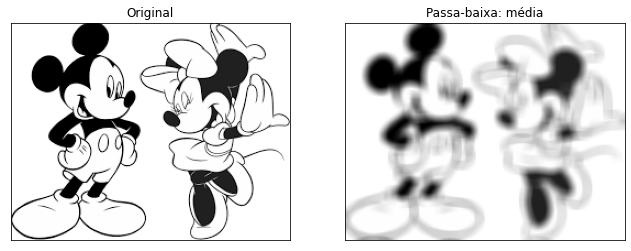

In [46]:
image = cv2.imread('/content/mickeyMinnie.png')

figure_size = 9 # a dimensão dos eixos x e y do kernel
new_image = cv2.blur(image,(figure_size, figure_size)) #desfocar uma imagem usando o filtro 
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')

plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image)
plt.title('Passa-baixa: média')
plt.xticks([])
plt.yticks([])
plt.show()

**Não-linear:** 

*Mediana* - suaviza a imagem sem diminuir a resolução (borrar)

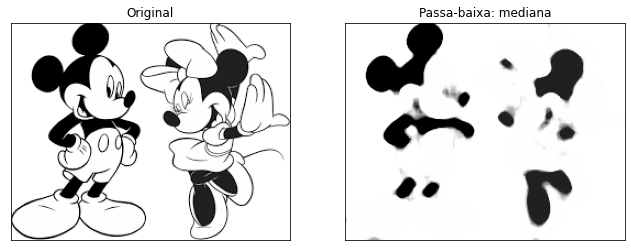

In [44]:
image = cv2.imread('/content/mickeyMinnie.png')

figure_size = 9 # a dimensão dos eixos x e y do kernel
median = cv2.medianBlur(image, figure_size) 

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')

plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(median)
plt.title('Passa-baixa: mediana')
plt.xticks([])
plt.yticks([])
plt.show()

* Passa-alta

**Não-linear:** 

*sobel* - realça linhas verticais e horizontais mais escuras que o fundo, sem realçar pontos isolados

Imagem Original


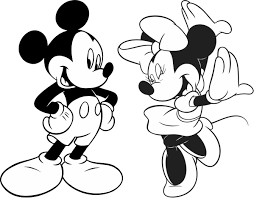


Passa-alta: Sobel


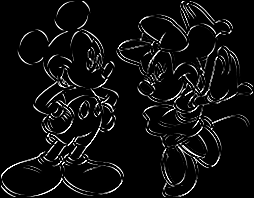

In [62]:
image = cv2.imread('/content/mickeyMinnie.png')

sobelx = cv2.Sobel(image,cv2.CV_64F,1,0)  # x
sobely = cv2.Sobel(image,cv2.CV_64F,0,1)  # y
sobelxy = cv2.Sobel(image,cv2.CV_64F,1,1)  # y

print("Imagem Original")
cv2_imshow(image)

print()

print("Passa-alta: Sobel")
cv2_imshow(sobelxy)

#**Filtragem no domínio espacial**

* Correlação

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

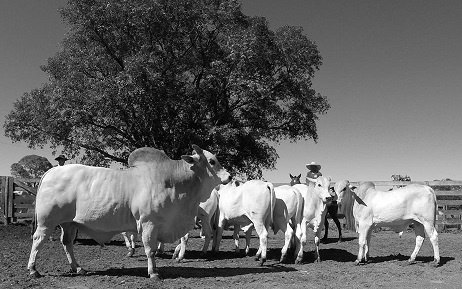

In [2]:
# imagem original -> 0 = grayscape
imgOriginal = cv.imread('/content/original.jpg', 0)
cv2_imshow(imgOriginal)

In [3]:
# correlação -> movendo a máscara sobre a imagem
def correlacao(img, img_corr, mascara):

  # criando uma nova imagem -> tamanho + bordas da mascara
  img_correlacao = np.zeros(np.array(img.shape) + np.array(mascara.shape) - 1)

  # percorrendo a mascara
  for x in range(mascara.shape[0]):
    for y in range(mascara.shape[1]):

      # copia os valores para a imagem nova
      img_correlacao[x:x+img.shape[0], y:y+img.shape[1]] += img * mascara[x,y]

      return img_correlacao.astype('uint8')


In [4]:
# imagem original -> 0 = grayscape
img = cv.imread('/content/original.jpg', 0)

# imagem para comparar com a original
img_corr = cv.imread('/content/original.jpg', 0)

# criando a mascara com o mesmo peso
mascara = np.array([ [1,1,1], [1,1,1], [1,1,1] ])

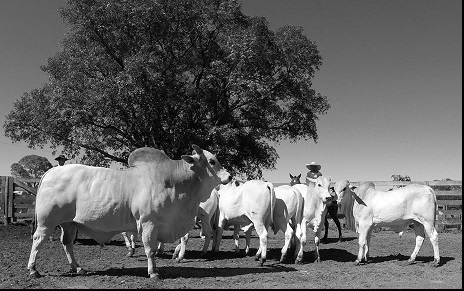


[[ 98  98  98 ...  86   0   0]
 [ 97  97  97 ...  86   0   0]
 [ 97  97  97 ...  86   0   0]
 ...
 [108 106  95 ... 136   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [5]:
imagemCorrelacao = correlacao(img, img_corr, mascara)
cv2_imshow(imagemCorrelacao)

print('')

print(imagemCorrelacao)

* Convolução

In [6]:
def rotate_180(image):
    
    size_image = image.shape
    M = size_image[0]
    N = size_image[1]
    
    new_image = np.zeros((M, N))
    
    for i in range (0, M):
        for j in range(0, N):
            new_image[(M-1)-i, (N-1)-j] = image[i,j]
            
    return new_image

In [7]:
def get_slice(point, size, image):
    
    delta = int(size/2)
    
    a = (point[0] - delta)
    b = (point[1] - delta)
    
    return image[a:(a+size),b:(b+size)]  

In [8]:
def convolucao(imagem, mascara):  
    
    size_imagem = imagem.shape
    
    M = size_imagem[0]
    N = size_imagem[1]
    
    size_mascara = mascara.shape
    
    m = size_mascara[0]
    n = size_mascara[1]
    
    nova_imagem = np.zeros(imagem.shape)
    
    delta = int(m/2)
    
    for i in range (0+delta, M-delta):
        for j in range(0+delta, N-delta):
            
            slice_imagem = get_slice((i,j),m,imagem)
            
            mascara_180 = rotate_180(mascara)
            
            new_i_j = np.sum(slice_imagem * mascara_180)
            
            nova_imagem[i,j] = new_i_j
            
    return nova_imagem

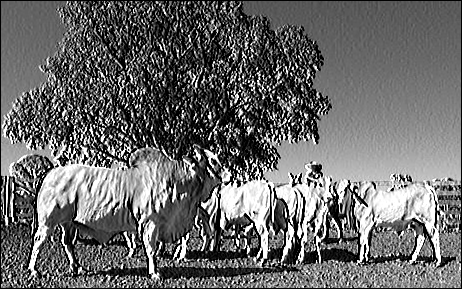


[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  97.  97. ...  89. 101.   0.]
 [  0.  97.  97. ...  89.  98.   0.]
 ...
 [  0. 166. 111. ... 158. 128.   0.]
 [  0. 119. 104. ... 129. 134.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [9]:
mascara = np.array([[-1, 0, 1], [-2, 1, 2], [-1, 0, 1]])

imagemConvolucao = convolucao(imgOriginal,mascara)
cv2_imshow(imagemConvolucao)

print('')

print(imagemConvolucao)

#**Filtragem no domínio da frequência**

* Transformadas de Fourier



In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

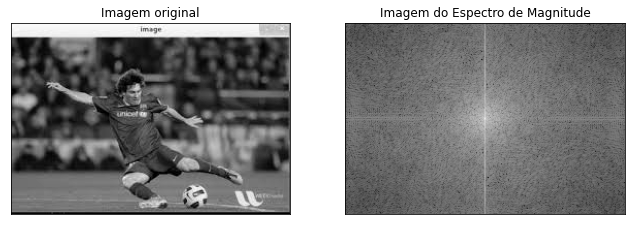

In [31]:
img = cv.imread('/content/messi.jpg',0)

# deslocando o componente de frequência zero para o centro do espectro
# dft -> determina a transformação discreta de Fourier
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# salvando a imagem da imagem no domínio fourier
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# exibindo as duas imagens
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Imagem original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Imagem do Espectro de Magnitude')
plt.xticks([])
plt.yticks([])
plt.show()

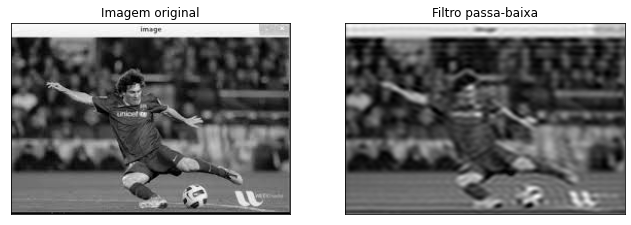

In [32]:
rows, cols = img.shape 
crow,ccol = rows//2 , cols//2 

# criando uma máscara primeiro, o quadrado central é 1, permanecendo todos os zeros 
mask = np.zeros((rows,cols,2),np.uint8) 
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 

# aplicando a máscara e a inversa da transformada de Fourier 
fshift = dft_shift*mask 
f_ishift = np.fft.ifftshift(fshift) 
img_back = cv.idft(f_ishift) 
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

# exibindo as imagens
plt.figure(figsize=(11,6)) 
plt.subplot(121)
plt.imshow(img, cmap = 'gray') 
plt.title('Imagem original')
plt.xticks([])
plt.yticks([]) 

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray') 
plt.title('Filtro passa-baixa')
plt.xticks([])
plt.yticks([]) 
plt.show()

* Transformada Inversa de Fourier

Ex.: Criar uma bola no centro de uma imagem e considerá-la que está no domínio da frequência

In [28]:
# criar uma imagem de 300 linhas e 300 colunas
MN = 300
imgT = np.zeros((MN, MN, 1), np.uint8)

# posição do centro da imagem
x = y = int(MN/2)

# tamanho do raio do círculo
raio = 30

# array de indices com base no tamanho da imagem
I,J = np.meshgrid(np.arange(imgT.shape[0]),np.arange(imgT.shape[1]))

# calcular a distancia dos pontos com o centro (euclidiana)
distancia = np.sqrt((I-x)**2+(J-y)**2)

# colocar a intensidade 255 nos pontos onde a distância é menor que o raio
imgT[np.where(distancia<raio)] = 255

# transformada inversa de Fourier na imagem com o círculo no centro
img_fourier = np.fft.fftshift(imgT)

Imagem no domínio da frequência


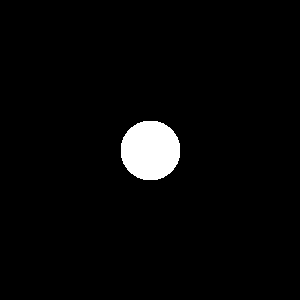

In [30]:
print("Imagem no domínio da frequência")
cv2_imshow(imgT)

Transformada Inversa de Fourier para voltar ao domínio espacial


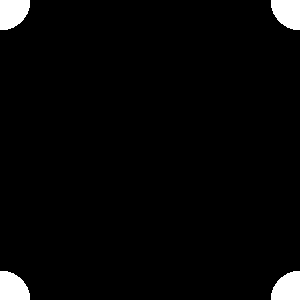

In [27]:
print("Transformada Inversa de Fourier para voltar ao domínio espacial")
cv2_imshow(img_fourier)